### Entendimento sobre os requisitos do projeto 

Train.csv conterá os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, mais importante, revelará se eles sobreviveram ou não, também conhecido como “verdade terrestre”.

O test.csvconjunto de dados contém informações semelhantes, mas não revela a “verdade real” para cada passageiro. É seu trabalho prever esses resultados.

Usando os padrões encontrados nos train.csvdados, preveja se os outros 418 passageiros a bordo (encontrados em test.csv) sobreviveram.

### Coleta e visualização dos dados 

In [2]:
# Importando as bibliotecas dos dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregando os dados de treinamento e teste
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")



In [4]:
# Visualizando algumas amostras dos dados de treinamento
print(train_data.head(50))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

In [5]:
#Visualizando informações referentes ao conjunto de dados de treinamento 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Verificar dados ausentes no conjunto de dados de treino 

dados_ausentes = train_data.isna()

print(dados_ausentes)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

### Limpeza/manipulação dos dados 

In [7]:
# Remover linhas com valores NaN
df_sem_nans_linhas = train_data.dropna()

# Remover colunas com valores NaN
df_sem_nans_colunas = train_data.dropna(axis=1)



In [8]:
# Vizualizando dados de teste
print(test_data.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [9]:
#Visualizando informações do conjunto de dados de teste 

print(test_data.info)

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [10]:
# Supondo que 'train_data' é o DataFrame que contém os dados do Titanic, e 'Age' é a coluna com as idades
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())  # Preenche valores ausentes com a mediana das idades

bins = [0, 18, 30, 50, 100]  # Limites das faixas etárias
labels = ['0-17', '18-29', '30-49', '50+']  # Rótulos das faixas etárias
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

print(train_data['AgeGroup'].head())

0    18-29
1    30-49
2    18-29
3    30-49
4    30-49
Name: AgeGroup, dtype: category
Categories (4, object): ['0-17' < '18-29' < '30-49' < '50+']


## Análise Estatística dos dados 

In [12]:
# estatística para cada atributo do banco de dados 
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(train_data.isnull().sum() / train_data.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
AgeGroup       0.000000
dtype: float64

## Valores inconsistentes

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-49
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-49


In [15]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
AgeGroup       891
dtype: int64

In [16]:
train_data = train_data.drop(columns=['Cabin'])

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-49
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-49


In [18]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
AgeGroup       891
dtype: int64

## Análise dos dados 

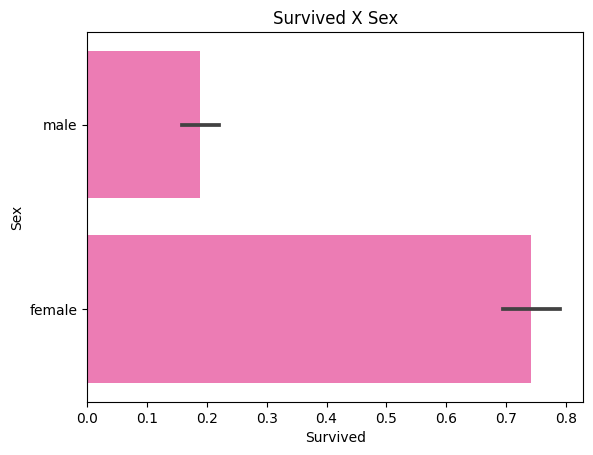

In [19]:
# saber a distribuição de sobreviventes de acordo com o genêro
# achei a distribuição interessante
sns.barplot(x="Survived", y="Sex", data = train_data, color = 'hotpink')
plt.title("Survived X Sex")
plt.show()

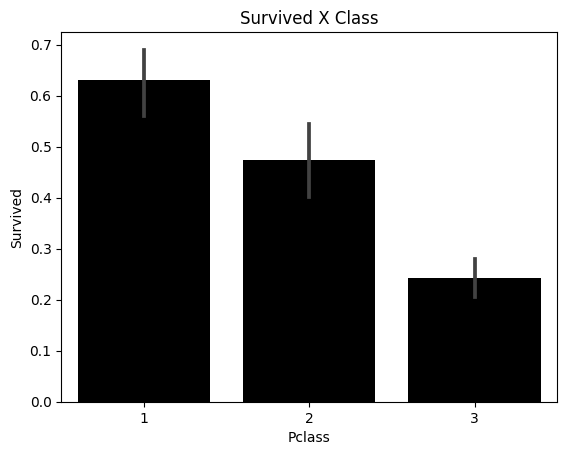

In [20]:
# saber a distribuição de sobreviventes de acordo com o genêro
# achei a distribuição interessante
sns.barplot(x="Pclass", y="Survived", data = train_data, color = 'black')
plt.title("Survived X Class")
plt.show()

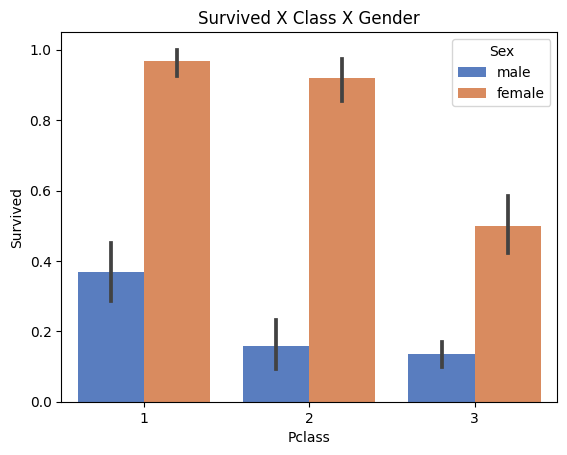

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data, palette="muted")
plt.title("Survived X Class X Gender")
plt.show()


In [22]:
# como os valores categóricos estão na mesma escala, acho que não é necessário fazer mudanças neles

C:\Users\brena\AppData\Local\Temp\ipykernel_4552\818332919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = train_data.corr(method="pearson") #get variables the correlation


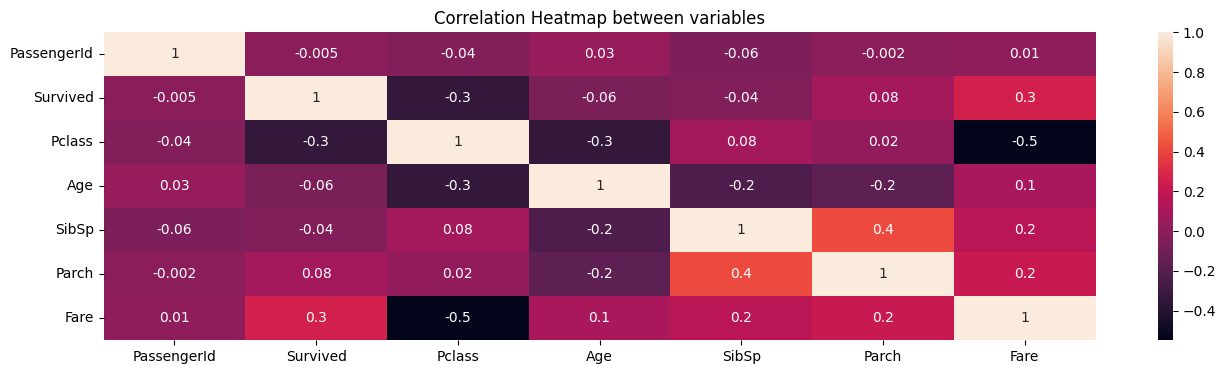

In [23]:
# correlação entre todas os tipos de atributos do conjunto de dados
corr_table = train_data.corr(method="pearson") #get variables the correlation

#Plotando a tabela de correlação usando o Seaborn.
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #mostrando o plot